# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## 1: Plot number of people by gender

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


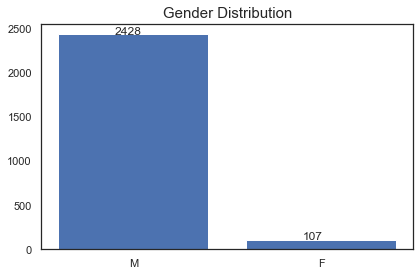

In [139]:
sns.set(style='white')
plt.bar(kill.gender.value_counts().index, kill.gender.value_counts())
for i in range(len(kill.gender.value_counts().index)):
    plt.annotate(kill.gender.value_counts()[i],(-0.1 + i, kill.gender.value_counts()[i] + 1 ))
plt.title('Gender Distribution', size=15)
plt.tight_layout()
plt.show()


## 2: Plot 7 most common kill weapons

In [76]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

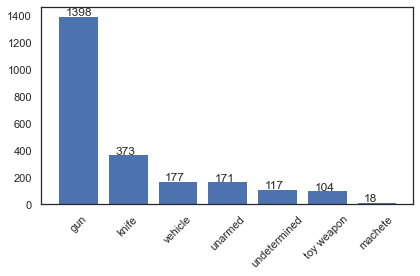

In [140]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(kill.armed.value_counts().head(7).index, kill.armed.value_counts().head(7))
for i in range(len(kill.armed.value_counts().head(7))):
    plt.annotate(kill.armed.value_counts().head(7)[i],(-0.25 + i, kill.armed.value_counts().head(7)[i] + 1))

ax.set_xticklabels(kill.armed.value_counts().head(7).index, rotation=45)
plt.tight_layout()
plt.show()



## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [80]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [110]:
kill.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
age_cat                    float64
dtype: object

In [109]:
kill['age_cat'] = kill.age.astype('float64')

In [111]:
kill['age_cat'].dtypes

dtype('float64')

In [116]:
def change_num(x):
    if x < 25:
        return "below25"
    else:
        return "above25"

kill['age_cat'] = kill['age_cat'].map(change_num)

In [142]:
kill['age'].isna().sum()

77

In [141]:
kill['age_cat'].isna().sum()

0

In [117]:
kill['age_cat']

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    above25
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [118]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [119]:
kill['age_cat'].value_counts()

above25    2085
below25     450
Name: age_cat, dtype: int64

<Figure size 720x576 with 0 Axes>

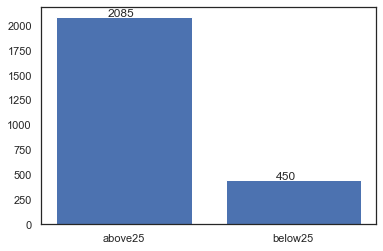

In [126]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
ax.bar(kill['age_cat'].value_counts().index, kill['age_cat'].value_counts())
for i in range(len(kill['age_cat'].value_counts().index)):
    plt.annotate(kill['age_cat'].value_counts()[i],(-0.1 + i, kill['age_cat'].value_counts()[i] + 1))

plt.show()

## 4: Plot number of killed poeple by race

In [127]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'age_cat'],
      dtype='object')

In [129]:
kill.race.value_counts(dropna=True)

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

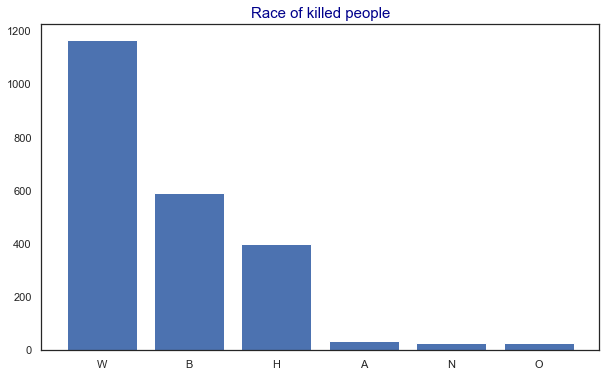

In [189]:
# with matplotlib
sns.set(rc={'figure.figsize' : (10,6)})
sns.set(style='white')
fig, ax = plt.subplots()
ax.bar(kill.race.value_counts().index, kill.race.value_counts())
ax.set_title('Race of killed people', color='darkblue', size=15)
plt.show()

## 5: Killed People According to Races (Pie Chart)

In [143]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [144]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [145]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [149]:
kill = kill.dropna()

In [150]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [151]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [152]:
kill.race.value_counts(dropna=False).index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [177]:
kill.race.value_counts(dropna=False).values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

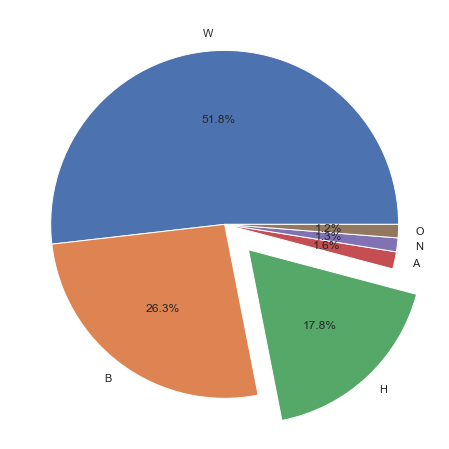

In [186]:
# matplotlib
sns.set(rc={'figure.figsize' : (12,8)})
sns.set(style='white')
fig, ax = plt.subplots()
ax.pie(kill.race.value_counts(dropna=False).values, labels=kill.race.value_counts(dropna=False).index, labeldistance= 1.1, autopct="%.1f%%", explode=[0,0,0.2,0,0,0])

plt.show()
